In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import seaborn as sn
import time
import math





In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("taxi_data_final.csv") 
df = df.drop('Unnamed: 0', axis = 1)
df.head()

Saving taxi_data_final.csv to taxi_data_final (1).csv


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,distance_mi,pickup_brooklyn,pickup_bronx,pickup_manhatten,pickup_queens,dropoff_brooklyn,dropoff_bronx,dropoff_manhatten,dropoff_queens,pickup_loc,dropoff_loc
0,2011-10-05 10:43:36,-73.992800,40.742900,-73.996900,40.747500,1,4.5,0.993590,0,0,1,0,0,0,1,0,manhatten,manhatten
1,2012-09-12 11:45:29,-73.972014,40.763332,-73.962586,40.775515,1,8.5,2.527796,0,0,1,0,0,0,1,0,manhatten,manhatten
2,2011-07-26 09:11:00,-73.981793,40.743592,-73.983923,40.753703,1,8.1,1.832846,0,0,1,0,0,0,1,0,manhatten,manhatten
3,2012-05-08 10:37:44,-73.972777,40.756115,-73.873318,40.774241,2,26.1,13.869388,0,0,1,0,0,0,0,1,manhatten,queens
4,2015-02-14 19:23:20,-73.968391,40.770561,-73.974434,40.762493,1,5.0,1.660408,0,0,1,0,0,0,1,0,manhatten,manhatten


In [ ]:
df['pickup_datetime'] = pd.to_datetime(df["pickup_datetime"])
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Day'] = df['pickup_datetime'].dt.day
df['Time'] = df['pickup_datetime'].dt.hour
df_model = df.drop(["pickup_datetime",'pickup_longitude','pickup_latitude','dropoff_longitude', 'dropoff_latitude' ], axis = 1)
df_model.head()

,passenger_count,fare_amount,distance_mi,pickup_brooklyn,pickup_bronx,pickup_manhatten,pickup_queens,dropoff_brooklyn,dropoff_bronx,dropoff_manhatten,dropoff_queens,pickup_loc,dropoff_loc,Year,Month,Day,Time
0,1,4.5,0.993590,0,0,1,0,0,0,1,0,manhatten,manhatten,2011,10,5,10
1,1,8.5,2.527796,0,0,1,0,0,0,1,0,manhatten,manhatten,2012,9,12,11
2,1,8.1,1.832846,0,0,1,0,0,0,1,0,manhatten,manhatten,2011,7,26,9
3,2,26.1,13.869388,0,0,1,0,0,0,0,1,manhatten,queens,2012,5,8,10
4,1,5.0,1.660408,0,0,1,0,0,0,1,0,manhatten,manhatten,2015,2,14,19


numpy.int64

In [ ]:
df_model.columns


Index(['passenger_count', 'fare_amount', 'distance_mi', 'pickup_brooklyn',
       'pickup_bronx', 'pickup_manhatten', 'pickup_queens', 'dropoff_brooklyn',
       'dropoff_bronx', 'dropoff_manhatten', 'dropoff_queens', 'pickup_loc',
       'dropoff_loc', 'Year', 'Month', 'Day', 'Time'],
      dtype='object')

In [ ]:
Y = df_model['fare_amount']
df_model['pickup_loc'].replace(['manhatten', 'queens', 'bronx', 'brooklyn', 'staten'],
                        [0, 1, 2, 3, 4], inplace=True)

df_model['dropoff_loc'].replace(['manhatten', 'queens', 'bronx', 'brooklyn', 'staten'],
                        [0, 1, 2, 3, 4], inplace=True)

#df_model = df_model.drop(['Time','fare_amount'], axis = 1)
df_model = df_model.drop(['fare_amount'], axis = 1)

In [ ]:
df_model.head()

,passenger_count,distance_mi,pickup_brooklyn,pickup_bronx,pickup_manhatten,pickup_queens,dropoff_brooklyn,dropoff_bronx,dropoff_manhatten,dropoff_queens,pickup_loc,dropoff_loc,Year,Month,Day,Time
0,1,0.993590,0,0,1,0,0,0,1,0,0,0,2011,10,5,10
1,1,2.527796,0,0,1,0,0,0,1,0,0,0,2012,9,12,11
2,1,1.832846,0,0,1,0,0,0,1,0,0,0,2011,7,26,9
3,2,13.869388,0,0,1,0,0,0,0,1,0,1,2012,5,8,10
4,1,1.660408,0,0,1,0,0,0,1,0,0,0,2015,2,14,19


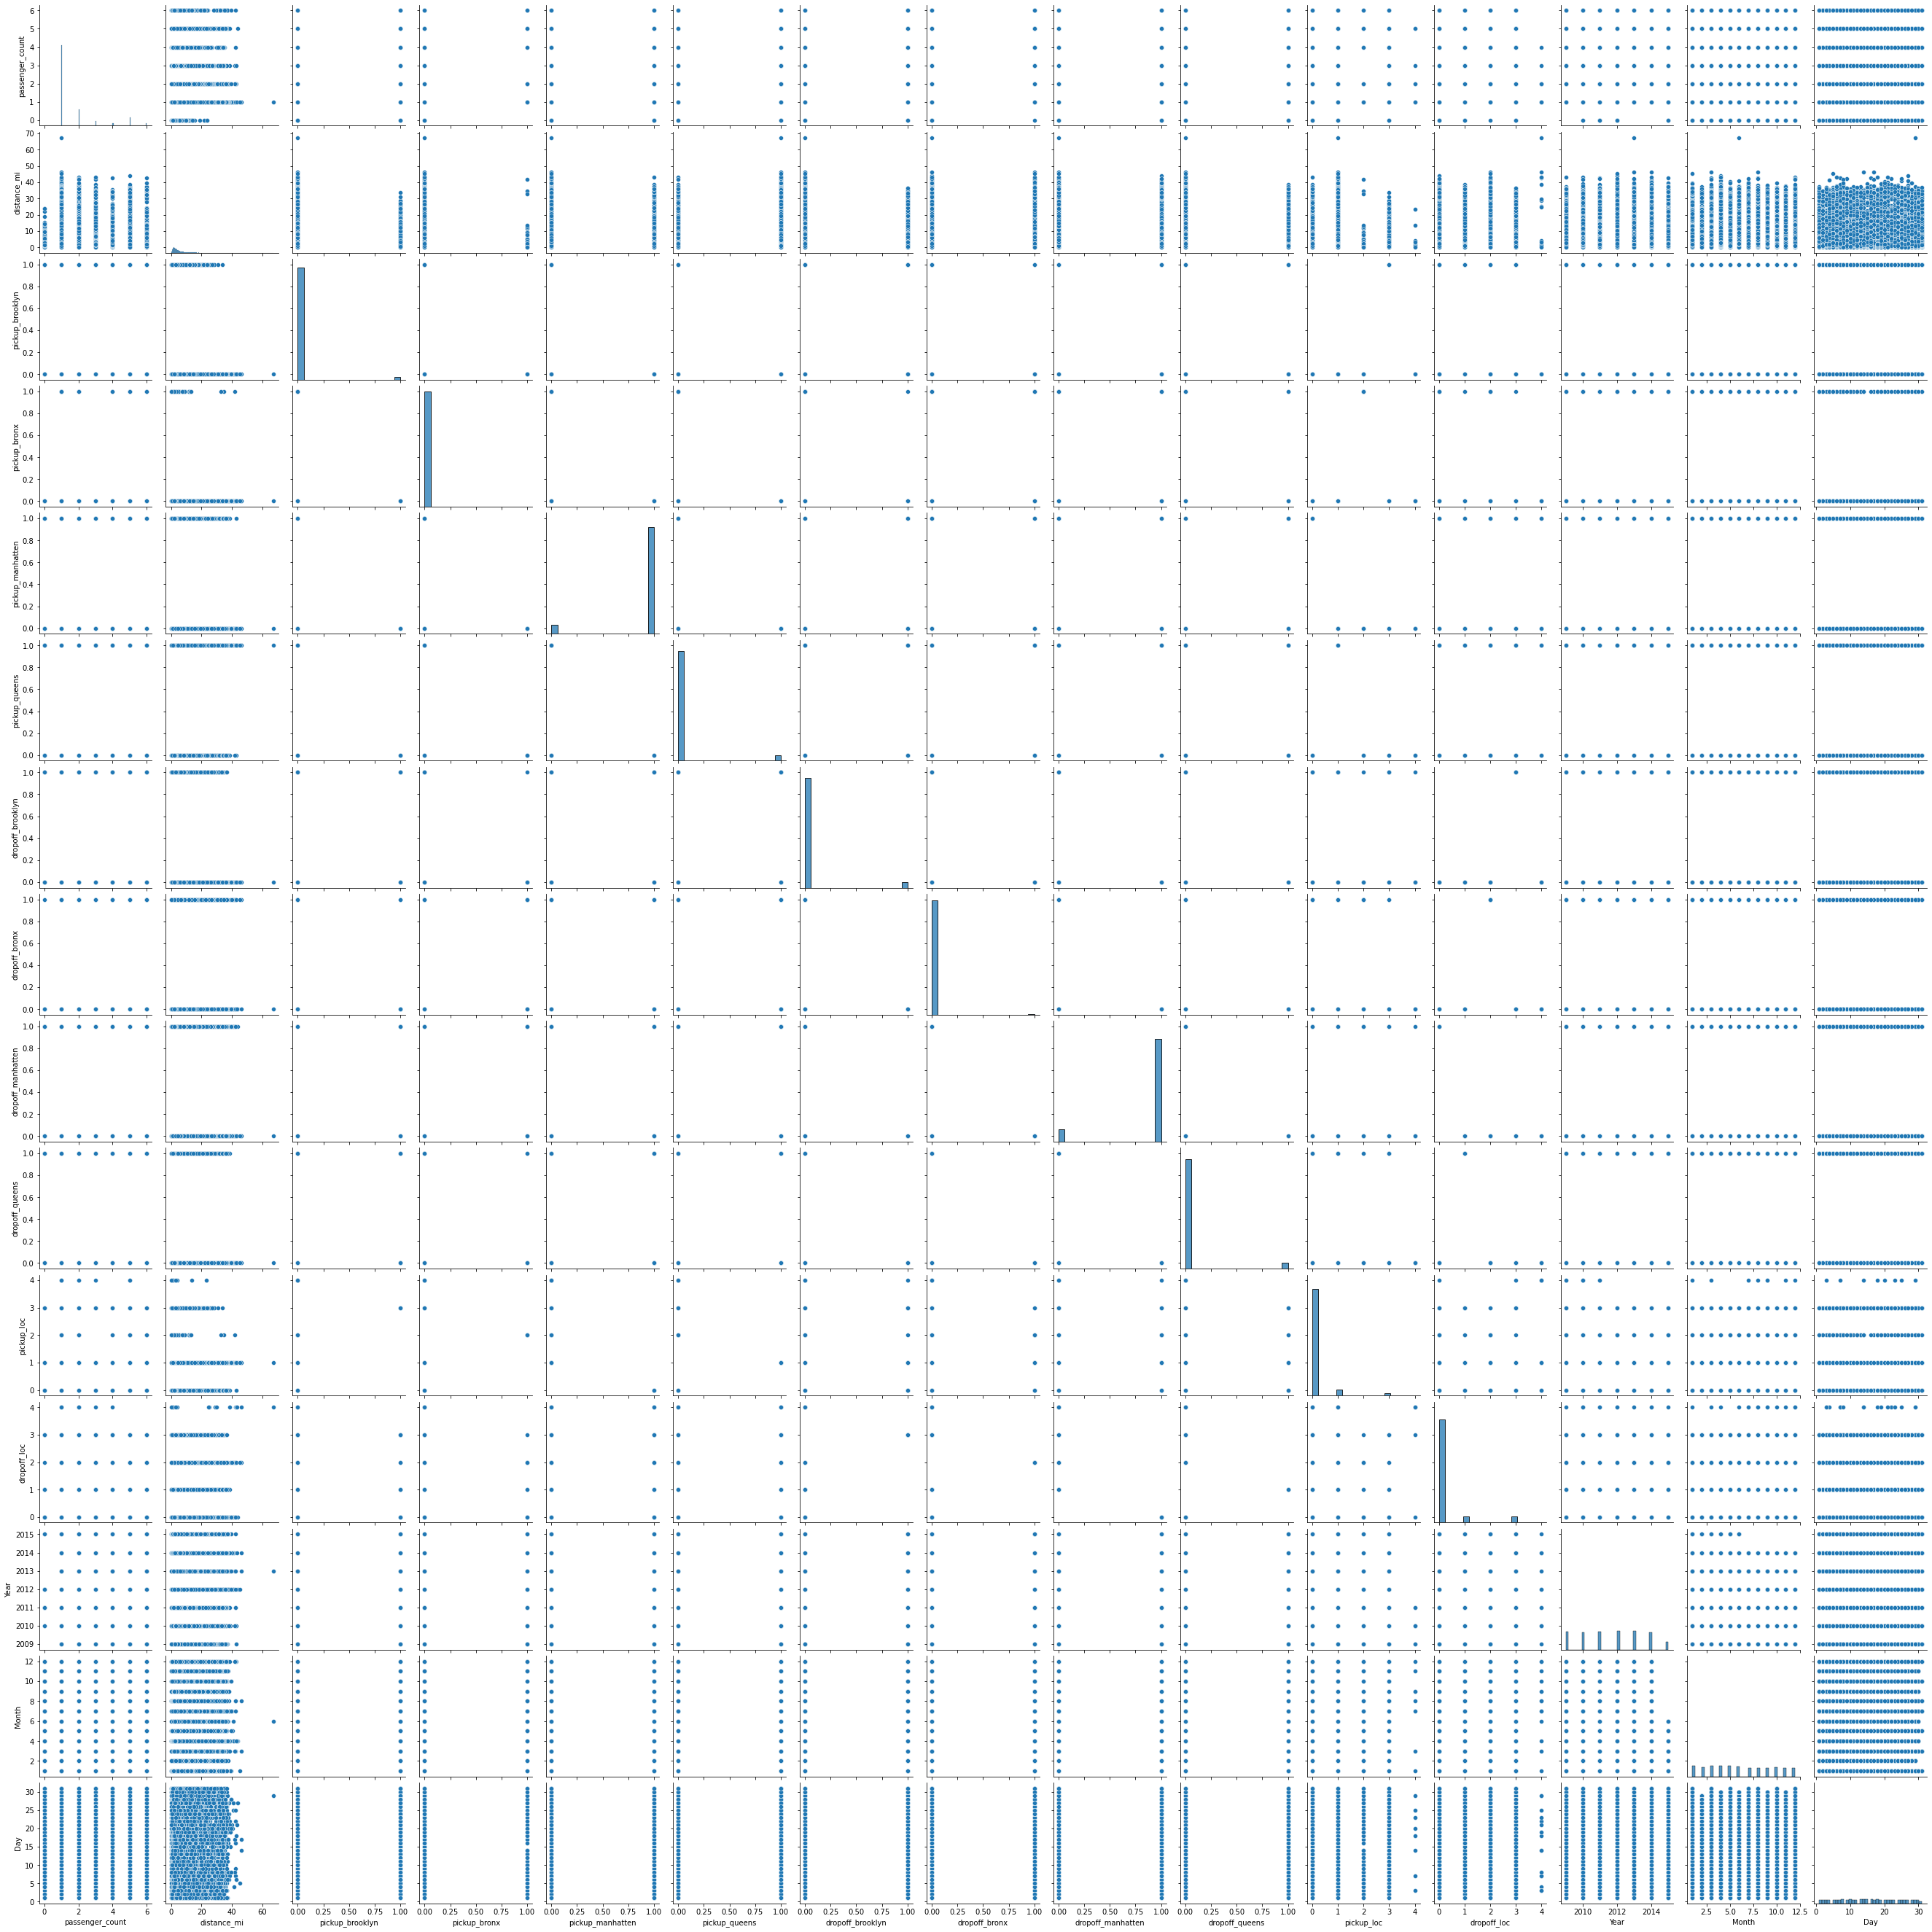

In [ ]:
# Linear Regression 

#find correlation between params
sn.pairplot(df_model)

In [ ]:
X = df_model

In [ ]:
#Linear Regression 
from sklearn.model_selection import train_test_split

x_training, x_validation, y_training, y_validation =  train_test_split(X,Y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

model1.fit(x_training, y_training)

LinearRegression()

In [ ]:
predictions1 = model1.predict(x_validation)

predictions1
len(predictions1)

13491

In [ ]:
x_validation = np.arange(0,len(x_validation),1)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error as mae
lr_rmse = math.sqrt(mean_squared_error(y_validation, predictions1))
lr_mae = mae(y_validation, predictions1)

print("RMSE:", math.sqrt(mean_squared_error(y_validation, predictions1)))

print("Mean Absolute Error:", mae(y_validation, predictions1))

RMSE: 3.772181900703699
Mean Absolute Error: 2.113267601006029


In [ ]:
# K-nearest Neighboor
X = df_model

# split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

#standarize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neighbors import KNeighborsRegressor

knn_mse = [0]*10
time_pred = [0]*10
for k in range(1,11):
  #fit model
  Knn_model_test = KNeighborsRegressor(n_neighbors = k)
  Knn_model_test.fit(X_train, y_train)

  #predict values based on model
  t0 = time.time()
  y_pred = Knn_model_test.predict(X_test)   
  t1 = time.time()
  total = t1-t0
  #determine MSE and time taken
  knn_mse[k-1] = mse(y_test,y_pred)
  time_pred[k-1] = total




NameError: ignored

In [ ]:
min_mse = min(knn_mse)
best_k_index = [index for index, value in enumerate(knn_mse) if value == min_mse]
print(best_k_index)
print(min_mse)
print(time_pred)

[9]
15.266694001556592
[5.007054090499878, 5.501908540725708, 9.915595531463623, 10.395520448684692, 8.837465524673462, 8.86408281326294, 8.838327646255493, 8.816910743713379, 8.85519790649414, 8.87474274635315]


In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from ctypes import memset
#final model
Knn_model = KNeighborsRegressor(n_neighbors = 10)
Knn_model.fit(X_train, y_train)
y_pred = Knn_model.predict(X_test)  

knn_rmse = math.sqrt(mse(y_test, y_pred))
knn_mae = mae(y_test, y_pred)

print("RMSE:", math.sqrt(mse(y_test, y_pred)))
print("Mean Absolute Error:", mae(y_test, y_pred))
print("MSE:", mse(y_test, y_pred))

RMSE: 3.9072617011862145
Mean Absolute Error: 2.1969143132458675
MSE: 15.266694001556592


In [ ]:
from os import RTLD_DEEPBIND
# Regression Trees
X = df_model

# split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

#predict values based on model
y_pred = decision_tree_model.predict(X_test)   

#determine MSE
mse = mean_squared_error(y_test,y_pred)

rt_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
rt_mae = mae(y_test, y_pred)

print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mae(y_test, y_pred))


RMSE: 5.263703332677689
Mean Absolute Error: 2.844442220739752


In [ ]:
# Neural Networks

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error as mae
from tensorflow.keras.optimizers import SGD

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

print( X_train.shape)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(15,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


model.compile(optimizer='adam',
              loss= 'binary_crossentropy')

history = model.fit(X_train, y_train,
          batch_size=40, epochs=20, validation_split=0.3)

y_pred = model.predict(X_test)
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mae(y_test, y_pred))

(40472, 15)
Epoch 1/20
709/709 [==============================] - 3s 3ms/step - loss: -2371610.2500 - val_loss: -9860786.0000
Epoch 2/20
709/709 [==============================] - 2s 3ms/step - loss: -34628984.0000 - val_loss: -72616968.0000
Epoch 3/20
709/709 [==============================] - 2s 3ms/step - loss: -134186168.0000 - val_loss: -215731664.0000
Epoch 4/20
709/709 [==============================] - 2s 3ms/step - loss: -321550816.0000 - val_loss: -455633920.0000
Epoch 5/20
709/709 [==============================] - 2s 3ms/step - loss: -608263680.0000 - val_loss: -800620928.0000
Epoch 6/20
709/709 [==============================] - 2s 3ms/step - loss: -1002372800.0000 - val_loss: -1258951808.0000
Epoch 7/20
709/709 [==============================] - 2s 3ms/step - loss: -1512499328.0000 - val_loss: -1839540480.0000
Epoch 8/20
709/709 [==============================] - 2s 3ms/step - loss: -2147136256.0000 - val_loss: -2550654464.0000
Epoch 9/20
709/709 [========================

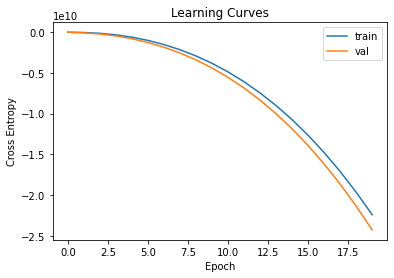

In [ ]:
from matplotlib import pyplot


pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
nn_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
nn_mae = mae(y_test, y_pred)

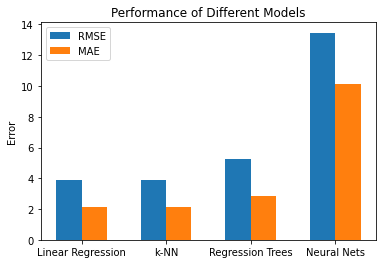

In [ ]:
# Numbers of pairs of bars you want
N = 4

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = [lr_rmse,knn_rmse, rt_rmse,nn_rmse ]
# Specify the values of orange bars (height)
orange_bar = [lr_mae,knn_mae, rt_mae,nn_mae]

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
#plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, (blue_bar) , width, label='RMSE')
plt.bar(ind + width, (orange_bar), width, label='MAE')

plt.ylabel('Error')
plt.title('Performance of Different Models')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Linear Regression', 'k-NN', 'Regression Trees', 'Neural Nets'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Impact of K on MSE')

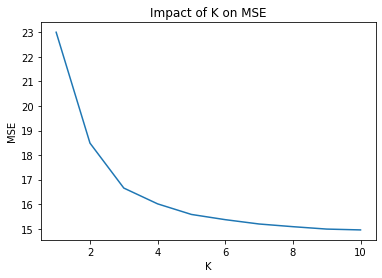

In [ ]:
k = list(range(1, 11))

plt.plot(k,(knn_mse))
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("Impact of K on MSE")


In [ ]:
len(y_pred)

13491

Text(0.5, 1.0, 'Impact of K on Time to Predict 13,500 Samples')

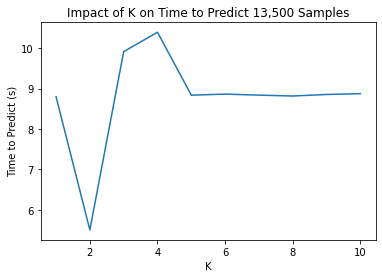

In [ ]:
k = list(range(1, 11))
plt.plot(k,(time_pred))
plt.xlabel("K")
plt.ylabel("Time to Predict (s)")
plt.title("Impact of K on Time to Predict 13,500 Samples")

In [ ]:
df_model.columns
test_data = [1, 4, 0,0,1,0,0,0,1,0,0,0,2012,10,3,10]
test = pd.DataFrame(data = [test_data], columns = df_model.columns)
y = [0]*23
for i in range(1,24):
  test["Time"] = i
  y[i-1] = Knn_model.predict(test) 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, bu

Text(0.5, 1.0, 'Impact of Time of Day')

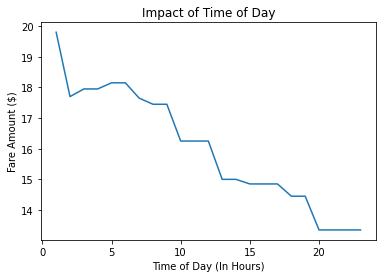

In [ ]:
t = list(range(1, 24))
plt.plot(t,y)
plt.xlabel("Time of Day (In Hours)")
plt.ylabel("Fare Amount ($)")
plt.title("Impact of Time of ay")

In [ ]:
df_model.columns

Index(['passenger_count', 'distance_mi', 'pickup_brooklyn', 'pickup_bronx',
       'pickup_manhatten', 'pickup_queens', 'dropoff_brooklyn',
       'dropoff_bronx', 'dropoff_manhatten', 'dropoff_queens', 'pickup_loc',
       'dropoff_loc', 'Year', 'Month', 'Day', 'Time'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, bu

Text(0.5, 1.0, 'Impact of Distance')

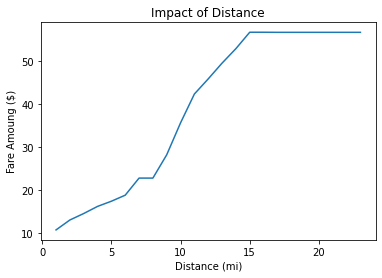

In [ ]:
test_data = [1, 4, 0,0,1,0,0,0,1,0,0,0,2012,10,3,10]
test = pd.DataFrame(data = [test_data], columns = df_model.columns)
y = [0]*23
for i in range(1,24):
  test["distance_mi"] = i
  y[i-1] = Knn_model.predict(test) 

d = list(range(1, 24))
plt.plot(t,y)
plt.xlabel("Distance (mi)")
plt.ylabel("Fare Amoung ($)")
plt.title("Impact of Distance")